# Lab 1 by Maximova Viktoria

# Задача
#### Классифицировать крафтовые напитки, описанные набором признаков, по их стилю.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

- `abv` - The alcoholic content by volume with 0 being no alcohol and 1 being pure alcohol
- `ibu` - International bittering units, which describe how bitter a drink is.
- `id` - Unique ID
- `name` - Name of the beer.
- `style` - Beer style (lager, ale, IPA, etc.)
- `brewery_id` - Unique identifier for brewery that produces this beer; can use to join with brewery info.
- `ounces` - Size of beer in ounces.

- `name` - Name of the brewery
- `city` - City that the brewery is located in.
- `state` - State that the brewery is located in.

In [2]:
# url = "https://www.kaggle.com/nickhould/craft-cans/"
# get beers.csv and breweries.csv
data = pd.read_csv('beers.csv', sep=',', header=0, engine='python')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
5,5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
6,6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,7,0.065,NaN,2259,Foreman,American Porter,177,12.0
8,8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0
9,9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0


Видно, что в `data` есть лишние столбцы - первый (так как дублирует индексацию) и четвертый (уникальный индекс не является значащим параметром). Уберем лишние столбы:

In [5]:
data = data.drop(columns="Unnamed: 0")
data = data.drop(columns="id")

In [6]:
data.tail()

,abv,ibu,name,style,brewery_id,ounces
2405,0.067,45.0,Belgorado,Belgian IPA,424,12.0
2406,0.052,NaN,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,NaN,B3K Black Lager,Schwarzbier,424,12.0
2408,0.055,40.0,Silverback Pale Ale,American Pale Ale (APA),424,12.0
2409,0.052,NaN,Rail Yard Ale (2009),American Amber / Red Ale,424,12.0


In [7]:
data2 = pd.read_csv('breweries.csv', sep=';', header=0, engine='python')

In [8]:
data2

,Unnamed: 0,name,city,state,Unnamed: 4,Unnamed: 5,Unique states,Unnamed: 7,Count
0,102,King Street Brewing Company,Anchorage,AK,NaN,NaN,state,NaN,NaN
1,223,Midnight Sun Brewing Company,Anchorage,AK,NaN,NaN,AK,NaN,7.0
2,270,Alaskan Brewing Company,Juneau,AK,NaN,NaN,AL,NaN,3.0
3,453,Denali Brewing Company,Talkeetna,AK,NaN,NaN,AR,NaN,2.0
4,458,Kenai River Brewing Company,Soldotna,AK,NaN,NaN,AZ,NaN,11.0
5,493,Broken Tooth Brewing Company,Anchorage,AK,NaN,NaN,CA,NaN,39.0
6,557,Sleeping Lady Brewing Company,Anchorage,AK,NaN,NaN,CO,NaN,47.0
7,286,Back Forty Beer Company,Gadsden,AL,NaN,NaN,CT,NaN,8.0
8,412,Straight to Ale,Huntsville,AL,NaN,NaN,DC,NaN,1.0
9,478,Good People Brewing Company,Birmingham,AL,NaN,NaN,DE,NaN,2.0


В описании данных было заявлено, что breweries.csv содержит 4 поля, но их оказалось больше. Уберем лишние (начиная с 5-го).

In [9]:
data2.dtypes

Unnamed: 0          int64
name               object
city               object
state              object
Unnamed: 4        float64
Unnamed: 5        float64
Unique states      object
Unnamed: 7        float64
Count             float64
dtype: object

In [10]:
data2 = data2.drop(columns="Unnamed: 4")
data2 = data2.drop(columns="Unnamed: 5")
data2 = data2.drop(columns="Unique states ")
data2 = data2.drop(columns="Unnamed: 7")
data2 = data2.drop(columns="Count ")

In [11]:
data2.dtypes

Unnamed: 0     int64
name          object
city          object
state         object
dtype: object

In [12]:
data2.rename(columns={'Unnamed: 0':'brewery_id'}, inplace=True)

In [13]:
data2.tail()

,brewery_id,name,city,state
553,156,Greenbrier Valley Brewing Company,Lewisburg,WV
554,79,Black Tooth Brewing Company,Sheridan,WY
555,191,Snake River Brewing Company,Jackson,WY
556,457,The Black Tooth Brewing Company,Sheridan,WY
557,550,Wind River Brewing Company,Pinedale,WY


Пришло время объединить `data` и `data2`. Добавим в `data` три новых поля - name_brewery, city, state и заполним их значениями из `data2`

In [14]:
data.head()

,abv,ibu,name,style,brewery_id,ounces
0,0.050,NaN,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,Sex and Candy,American IPA,177,12.0


In [15]:
data2.head()

,brewery_id,name,city,state
0,102,King Street Brewing Company,Anchorage,AK
1,223,Midnight Sun Brewing Company,Anchorage,AK
2,270,Alaskan Brewing Company,Juneau,AK
3,453,Denali Brewing Company,Talkeetna,AK
4,458,Kenai River Brewing Company,Soldotna,AK


In [16]:
data2.dtypes

brewery_id     int64
name          object
city          object
state         object
dtype: object

In [17]:
data['brewery_name']=''
data['city']=''
data['state']=''

In [18]:
print(data.head())

     abv  ibu                 name                           style  \
0  0.050  NaN             Pub Beer             American Pale Lager   
1  0.066  NaN          Devil's Cup         American Pale Ale (APA)   
2  0.071  NaN  Rise of the Phoenix                    American IPA   
3  0.090  NaN             Sinister  American Double / Imperial IPA   
4  0.075  NaN        Sex and Candy                    American IPA   

   brewery_id  ounces brewery_name city state  
0         408    12.0                          
1         177    12.0                          
2         177    12.0                          
3         177    12.0                          
4         177    12.0                          


In [19]:
data.dtypes

abv             float64
ibu             float64
name             object
style            object
brewery_id        int64
ounces          float64
brewery_name     object
city             object
state            object
dtype: object

In [20]:
import copy
d = copy.deepcopy(data)

Заполним новые поля данными из `data2`

In [21]:
for i, row in d.iterrows():
    for j, row2 in data2.iterrows():
        if row2['brewery_id'] == row['brewery_id']:
            d['brewery_name'][i] = row2['name']
            d['city'][i] = row2['city']
            d['state'][i] = row2['state']
            break

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
d

,abv,ibu,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
5,0.077,NaN,Black Exodus,Oatmeal Stout,177,12.0,18th Street Brewery,Gary,IN
6,0.045,NaN,Lake Street Express,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
7,0.065,NaN,Foreman,American Porter,177,12.0,18th Street Brewery,Gary,IN
8,0.055,NaN,Jade,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
9,0.086,NaN,Cone Crusher,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN


In [23]:
# Теперь нам не нужен столбец `brewery_id`
d = d.drop(columns="brewery_id")

In [24]:
d[['style', 'state']]

,style,state
0,American Pale Lager,OR
1,American Pale Ale (APA),IN
2,American IPA,IN
3,American Double / Imperial IPA,IN
4,American IPA,IN
5,Oatmeal Stout,IN
6,American Pale Ale (APA),IN
7,American Porter,IN
8,American Pale Ale (APA),IN
9,American Double / Imperial IPA,IN


In [25]:
d.describe()

,abv,ibu,ounces
count,2348.000000,1405.000000,2410.000000
mean,0.059773,42.713167,13.592241
std,0.013542,25.954066,2.352204
min,0.001000,4.000000,8.400000
25%,0.050000,21.000000,12.000000
50%,0.056000,35.000000,12.000000
75%,0.067000,64.000000,16.000000
max,0.128000,138.000000,32.000000


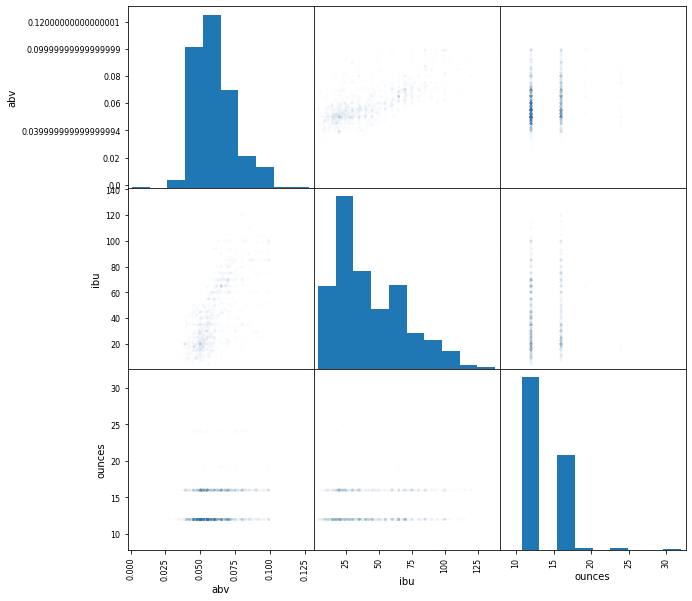

In [26]:
# Посмотрим, как данные коррелируют друг с другом
from pandas.plotting import scatter_matrix
scatter_matrix(d, alpha = .01, figsize = (10, 10))
pass

In [27]:
d.corr()

,abv,ibu,ounces
abv,1.000000,0.670621,0.172529
ibu,0.670621,1.000000,0.054691
ounces,0.172529,0.054691,1.000000


Числовые признаки не сильно коррелируют между собой.

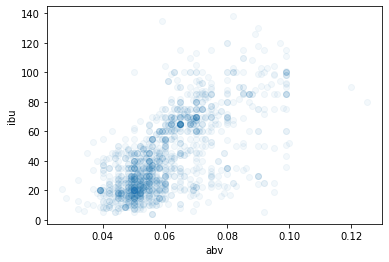

In [28]:
plt.plot(data['abv'], data['ibu'], 'o', alpha = 0.05)
plt.xlabel('abv')
plt.ylabel('ibu')
pass

In [29]:
d['style'] == 'American IPA'

0       False
1       False
2        True
3       False
4        True
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28       True
29       True
        ...  
2380    False
2381    False
2382     True
2383    False
2384     True
2385    False
2386     True
2387    False
2388     True
2389    False
2390     True
2391    False
2392    False
2393     True
2394    False
2395     True
2396     True
2397    False
2398    False
2399     True
2400    False
2401    False
2402    False
2403    False
2404    False
2405    False
2406    False
2407    False
2408    False
2409    False
Name: style, Length: 2410, dtype: bool

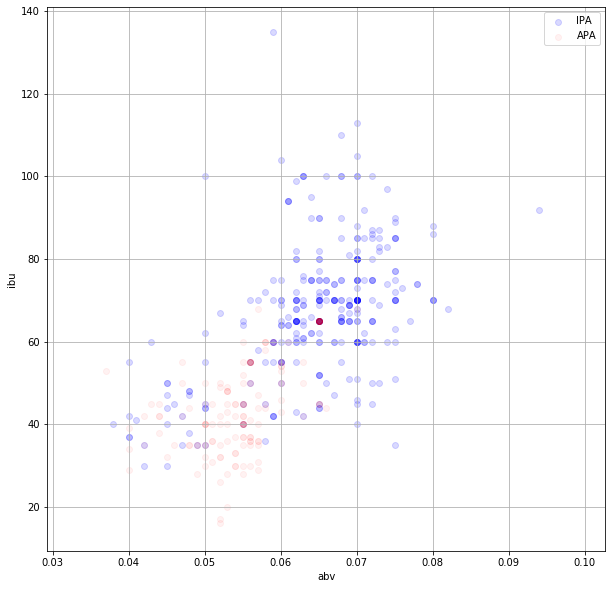

In [30]:
plt.figure(figsize = (10, 10))

plt.scatter(d[d['style'] == 'American IPA']['abv'],
            d[d['style'] == 'American IPA']['ibu'],
            alpha = 0.15,
            label = 'IPA',
            color = 'b')

plt.scatter(d[d['style'] == 'American Pale Ale (APA)']['abv'],
            d[d['style'] == 'American Pale Ale (APA)']['ibu'],
            alpha = 0.05,
            label = 'APA',
            color = 'r')

plt.xlabel('abv')
plt.ylabel('ibu')
plt.legend()
plt.grid()

In [31]:
d['style'].unique()

array(['American Pale Lager', 'American Pale Ale (APA)', 'American IPA',
       'American Double / Imperial IPA', 'Oatmeal Stout',
       'American Porter', 'Saison / Farmhouse Ale', 'Belgian IPA',
       'Cider', 'Baltic Porter', 'Tripel', 'American Barleywine',
       'Winter Warmer', 'American Stout', 'Fruit / Vegetable Beer',
       'English Strong Ale', 'American Black Ale', 'Belgian Dark Ale',
       'American Blonde Ale', 'American Amber / Red Ale',
       'Berliner Weissbier', 'American Brown Ale',
       'American Pale Wheat Ale', 'Belgian Strong Dark Ale', 'KÃ¶lsch',
       'English Pale Ale', 'American Amber / Red Lager',
       'English Barleywine', 'Milk / Sweet Stout', 'German Pilsener',
       'Pumpkin Ale', 'Belgian Pale Ale', 'American Pilsner',
       'American Wild Ale', 'English Brown Ale', 'Altbier',
       'California Common / Steam Beer', 'Gose', 'Cream Ale',
       'Vienna Lager', 'Witbier', 'American Double / Imperial Stout',
       'Munich Helles Lager', 'Schw

## Подготовка данных

In [32]:
categorical_columns = [c for c in d.columns if d[c].dtype.name == 'object']
numerical_columns   = [c for c in d.columns if d[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['name', 'style', 'brewery_name', 'city', 'state']
['abv', 'ibu', 'ounces']


In [33]:
for c in categorical_columns:
    print(c, d[c].unique())

name ['Pub Beer' "Devil's Cup" 'Rise of the Phoenix' ... 'B3K Black Lager'
 'Silverback Pale Ale' 'Rail Yard Ale (2009)']
style ['American Pale Lager' 'American Pale Ale (APA)' 'American IPA'
 'American Double / Imperial IPA' 'Oatmeal Stout' 'American Porter'
 'Saison / Farmhouse Ale' 'Belgian IPA' 'Cider' 'Baltic Porter' 'Tripel'
 'American Barleywine' 'Winter Warmer' 'American Stout'
 'Fruit / Vegetable Beer' 'English Strong Ale' 'American Black Ale'
 'Belgian Dark Ale' 'American Blonde Ale' 'American Amber / Red Ale'
 'Berliner Weissbier' 'American Brown Ale' 'American Pale Wheat Ale'
 'Belgian Strong Dark Ale' 'KÃ¶lsch' 'English Pale Ale'
 'American Amber / Red Lager' 'English Barleywine' 'Milk / Sweet Stout'
 'German Pilsener' 'Pumpkin Ale' 'Belgian Pale Ale' 'American Pilsner'
 'American Wild Ale' 'English Brown Ale' 'Altbier'
 'California Common / Steam Beer' 'Gose' 'Cream Ale' 'Vienna Lager'
 'Witbier' 'American Double / Imperial Stout' 'Munich Helles Lager'
 'Schwarzbier' 'MÃ¤

### Обработка пропусков

In [34]:
print(d[categorical_columns].count())
print(d[numerical_columns].count())

name            2410
style           2405
brewery_name    2410
city            2410
state           2410
dtype: int64
abv       2348
ibu       1405
ounces    2410
dtype: int64


In [35]:
d.index

RangeIndex(start=0, stop=2410, step=1)

Мы имеем пропущенные значения крепости `abv` - таких объектов не очень много, но все-таки не хотелось бы их терять. Заполним пропущенные значения медианными.

Для поля `ibu` пропущенные значения следует заменить 0, так как в напитке вполне может отсутствовать характеристика горечи.

Есть 5 объектов с незаполненным полем `style`- эти объекты можно убрать.

In [36]:
d.dropna(subset=['style'], inplace=True)

In [37]:
d.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2400, 2401, 2402, 2403, 2404, 2405, 2406, 2407, 2408, 2409],
           dtype='int64', length=2405)

In [38]:
print(d[categorical_columns].count())
print(d[numerical_columns].count())

name            2405
style           2405
brewery_name    2405
city            2405
state           2405
dtype: int64
abv       2346
ibu       1403
ounces    2405
dtype: int64


Заполним `ibu`

In [39]:
d['ibu'] = d['ibu'].fillna(0)

In [40]:
d['ibu']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14       60.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21       92.0
22       45.0
23        0.0
24       42.0
25       17.0
26       17.0
27       17.0
28       70.0
29       70.0
        ...  
2380     31.0
2381      0.0
2382     60.0
2383      0.0
2384     38.0
2385      0.0
2386     61.0
2387     23.0
2388     72.0
2389      0.0
2390    135.0
2391     15.0
2392      0.0
2393     82.0
2394     15.0
2395     69.0
2396     69.0
2397     25.0
2398     30.0
2399     69.0
2400     50.0
2401      0.0
2402      0.0
2403      0.0
2404      0.0
2405     45.0
2406      0.0
2407      0.0
2408     40.0
2409      0.0
Name: ibu, Length: 2405, dtype: float64

In [41]:
m = d['abv'].median()
print(m)

0.056


In [42]:
print(d['abv'].max())
print(d['abv'].min())

0.128
0.001


In [43]:
d['abv'].unique()

array([0.05 , 0.066, 0.071, 0.09 , 0.075, 0.077, 0.045, 0.065, 0.055,
       0.086, 0.072, 0.073, 0.069, 0.085, 0.061, 0.06 , 0.082, 0.099,
       0.079, 0.044, 0.049, 0.07 , 0.097, 0.068, 0.083, 0.059, 0.035,
       0.046, 0.052, 0.054, 0.084, 0.038, 0.042, 0.08 , 0.125, 0.04 ,
       0.076, 0.051, 0.053, 0.057, 0.043, 0.062, 0.056, 0.048, 0.058,
       0.047, 0.092, 0.032, 0.064, 0.063, 0.067, 0.088, 0.078, 0.081,
       0.095, 0.041, 0.098,   nan, 0.096, 0.093, 0.039, 0.089, 0.074,
       0.027, 0.094, 0.087, 0.037, 0.034, 0.091, 0.1  , 0.12 , 0.001,
       0.128, 0.104, 0.028])

In [44]:
d['abv'].fillna(m).unique()

array([0.05 , 0.066, 0.071, 0.09 , 0.075, 0.077, 0.045, 0.065, 0.055,
       0.086, 0.072, 0.073, 0.069, 0.085, 0.061, 0.06 , 0.082, 0.099,
       0.079, 0.044, 0.049, 0.07 , 0.097, 0.068, 0.083, 0.059, 0.035,
       0.046, 0.052, 0.054, 0.084, 0.038, 0.042, 0.08 , 0.125, 0.04 ,
       0.076, 0.051, 0.053, 0.057, 0.043, 0.062, 0.056, 0.048, 0.058,
       0.047, 0.092, 0.032, 0.064, 0.063, 0.067, 0.088, 0.078, 0.081,
       0.095, 0.041, 0.098, 0.096, 0.093, 0.039, 0.089, 0.074, 0.027,
       0.094, 0.087, 0.037, 0.034, 0.091, 0.1  , 0.12 , 0.001, 0.128,
       0.104, 0.028])

In [45]:
d['abv'] = d['abv'].fillna(m)

In [46]:
d.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2400, 2401, 2402, 2403, 2404, 2405, 2406, 2407, 2408, 2409],
           dtype='int64', length=2405)

In [47]:
print(d[categorical_columns].count())
print(d[numerical_columns].count())

name            2405
style           2405
brewery_name    2405
city            2405
state           2405
dtype: int64
abv       2405
ibu       2405
ounces    2405
dtype: int64


In [48]:
# Сохраним полученную таблицу в файл
export_csv = d.to_csv('data.csv')

Пропущенные значения обработаны.

In [49]:
d = pd.read_csv('data.csv', sep=',', header=0, engine='python')
d = d.drop(columns="Unnamed: 0")

### Векторизация

In [50]:
data_describe = d.describe(include = [object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['name', 'style', 'brewery_name', 'city', 'state']


In [51]:
data_describe

,name,style,brewery_name,city,state
count,2405,2405,2405,2405,2405
unique,2300,99,551,384,51
top,Nonstop Hef Hop,American IPA,Brewery Vivant,Grand Rapids,CO
freq,12,424,62,66,263


В наших данных отсутствуют бинарные категориальные признаки. Более того, для некоторых признаков уникальных значений очень много. Для признака `name` почти каждое значение - уникально. Удалим этот столбец позже, с остальными признаками сделаем векторизацию

In [52]:
print(d['style'].unique())

['American Pale Lager' 'American Pale Ale (APA)' 'American IPA'
 'American Double / Imperial IPA' 'Oatmeal Stout' 'American Porter'
 'Saison / Farmhouse Ale' 'Belgian IPA' 'Cider' 'Baltic Porter' 'Tripel'
 'American Barleywine' 'Winter Warmer' 'American Stout'
 'Fruit / Vegetable Beer' 'English Strong Ale' 'American Black Ale'
 'Belgian Dark Ale' 'American Blonde Ale' 'American Amber / Red Ale'
 'Berliner Weissbier' 'American Brown Ale' 'American Pale Wheat Ale'
 'Belgian Strong Dark Ale' 'KÃƒÂ¶lsch' 'English Pale Ale'
 'American Amber / Red Lager' 'English Barleywine' 'Milk / Sweet Stout'
 'German Pilsener' 'Pumpkin Ale' 'Belgian Pale Ale' 'American Pilsner'
 'American Wild Ale' 'English Brown Ale' 'Altbier'
 'California Common / Steam Beer' 'Gose' 'Cream Ale' 'Vienna Lager'
 'Witbier' 'American Double / Imperial Stout' 'Munich Helles Lager'
 'Schwarzbier' 'MÃƒÂ¤rzen / Oktoberfest'
 'Extra Special / Strong Bitter (ESB)' 'Rye Beer' 'Euro Dark Lager'
 'Hefeweizen' 'Foreign / Export Stou

In [53]:
class_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 99]
left_columns  = [c for c in categorical_columns if data_describe[c]['unique'] != 99]
left_columns.remove('name')
print(class_columns, left_columns)

['style'] ['brewery_name', 'city', 'state']


In [54]:
data_class = pd.get_dummies(d[class_columns])
print(data_class.columns)
print(len(data_class.columns))

data_cat = pd.get_dummies(d[left_columns])
print(data_cat.columns)
print(len(data_cat.columns))

Index(['style_Abbey Single Ale', 'style_Altbier',
       'style_American Adjunct Lager', 'style_American Amber / Red Ale',
       'style_American Amber / Red Lager', 'style_American Barleywine',
       'style_American Black Ale', 'style_American Blonde Ale',
       'style_American Brown Ale', 'style_American Dark Wheat Ale',
       'style_American Double / Imperial IPA',
       'style_American Double / Imperial Pilsner',
       'style_American Double / Imperial Stout', 'style_American IPA',
       'style_American India Pale Lager', 'style_American Malt Liquor',
       'style_American Pale Ale (APA)', 'style_American Pale Lager',
       'style_American Pale Wheat Ale', 'style_American Pilsner',
       'style_American Porter', 'style_American Stout',
       'style_American Strong Ale', 'style_American White IPA',
       'style_American Wild Ale', 'style_Baltic Porter',
       'style_Belgian Dark Ale', 'style_Belgian IPA', 'style_Belgian Pale Ale',
       'style_Belgian Strong Dark Ale', 

### Нормализация количественных признаков

In [55]:
data_numerical = d[numerical_columns]
data_numerical.describe()

,abv,ibu,ounces
count,2405.000000,2405.000000,2405.000000
mean,0.059684,24.933056,13.585572
std,0.013392,28.935641,2.323316
min,0.001000,0.000000,8.400000
25%,0.050000,0.000000,12.000000
50%,0.056000,18.000000,12.000000
75%,0.067000,42.000000,16.000000
max,0.128000,138.000000,32.000000


In [56]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [57]:
data_numerical.describe()

,abv,ibu,ounces
count,2.405000e+03,2.405000e+03,2.405000e+03
mean,-1.170821e-14,7.104504e-16,-2.130613e-15
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.381900e+00,-8.616729e-01,-2.231970e+00
25%,-7.230722e-01,-8.616729e-01,-6.824605e-01
50%,-2.750524e-01,-2.396026e-01,-6.824605e-01
75%,5.463171e-01,5.898243e-01,1.039216e+00
max,5.101184e+00,3.907532e+00,7.925923e+00


### Соединяем всё в одну таблицу

In [58]:
print(d.shape)
d.head()

(2405, 8)


,abv,ibu,name,style,ounces,brewery_name,city,state
0,0.050,0.0,Pub Beer,American Pale Lager,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,0.0,Devil's Cup,American Pale Ale (APA),12.0,18th Street Brewery,Gary,IN
2,0.071,0.0,Rise of the Phoenix,American IPA,12.0,18th Street Brewery,Gary,IN
3,0.090,0.0,Sinister,American Double / Imperial IPA,12.0,18th Street Brewery,Gary,IN
4,0.075,0.0,Sex and Candy,American IPA,12.0,18th Street Brewery,Gary,IN


In [59]:
d2 = pd.concat((data_numerical, data_class, data_cat), axis=1)
print(d2.shape)
print(d2)

(2405, 1088)
           abv       ibu    ounces  style_Abbey Single Ale  style_Altbier  \
0    -0.723072 -0.861673 -0.682461                       0              0   
1     0.471647 -0.861673 -0.682461                       0              0   
2     0.844997 -0.861673 -0.682461                       0              0   
3     2.263726 -0.861673 -0.682461                       0              0   
4     1.143677 -0.861673 -0.682461                       0              0   
5     1.293017 -0.861673 -0.682461                       0              0   
6    -1.096422 -0.861673 -0.682461                       0              0   
7     0.396977 -0.861673 -0.682461                       0              0   
8    -0.349722 -0.861673 -0.682461                       0              0   
9     1.965046 -0.861673 -0.682461                       0              0   
10    0.919667 -0.861673 -0.682461                       0              0   
11    0.994337 -0.861673 -0.682461                       0     

In [60]:
d2.describe()

,abv,ibu,ounces,style_Abbey Single Ale,style_Altbier,style_American Adjunct Lager,style_American Amber / Red Ale,style_American Amber / Red Lager,style_American Barleywine,style_American Black Ale,...,state_ SD,state_ TN,state_ TX,state_ UT,state_ VA,state_ VT,state_ WA,state_ WI,state_ WV,state_ WY
count,2.405000e+03,2.405000e+03,2.405000e+03,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,...,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000
mean,-1.170821e-14,7.104504e-16,-2.130613e-15,0.000832,0.005405,0.007484,0.055301,0.012058,0.001247,0.014969,...,0.002911,0.002495,0.053222,0.010811,0.016632,0.011227,0.028274,0.036175,0.000832,0.006237
std,1.000000e+00,1.000000e+00,1.000000e+00,0.028831,0.073338,0.086206,0.228615,0.109169,0.035304,0.121453,...,0.053883,0.049896,0.224523,0.103433,0.127915,0.105381,0.165790,0.186763,0.028831,0.078744
min,-4.381900e+00,-8.616729e-01,-2.231970e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.230722e-01,-8.616729e-01,-6.824605e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.750524e-01,-2.396026e-01,-6.824605e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.463171e-01,5.898243e-01,1.039216e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.101184e+00,3.907532e+00,7.925923e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Обучающая и тестовая выборка

In [61]:
X = d2.drop(data_class.columns, axis='columns')

In [62]:
y = d2[data_class.columns]

In [63]:
X.head()

,abv,ibu,ounces,brewery_name_10 Barrel Brewing Company,brewery_name_18th Street Brewery,brewery_name_2 Towns Ciderhouse,brewery_name_21st Amendment Brewery,brewery_name_3 Daughters Brewing,brewery_name_4 Hands Brewing Company,brewery_name_450 North Brewing Company,...,state_ SD,state_ TN,state_ TX,state_ UT,state_ VA,state_ VT,state_ WA,state_ WI,state_ WV,state_ WY
0,-0.723072,-0.861673,-0.682461,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.471647,-0.861673,-0.682461,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.844997,-0.861673,-0.682461,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.263726,-0.861673,-0.682461,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.143677,-0.861673,-0.682461,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
y.head()

,style_Abbey Single Ale,style_Altbier,style_American Adjunct Lager,style_American Amber / Red Ale,style_American Amber / Red Lager,style_American Barleywine,style_American Black Ale,style_American Blonde Ale,style_American Brown Ale,style_American Dark Wheat Ale,...,style_Schwarzbier,style_Scotch Ale / Wee Heavy,style_Scottish Ale,style_Shandy,style_Smoked Beer,style_Tripel,style_Vienna Lager,style_Wheat Ale,style_Winter Warmer,style_Witbier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
feature_names = X.columns

In [66]:
feature_names

Index(['abv', 'ibu', 'ounces', 'brewery_name_10 Barrel Brewing Company',
       'brewery_name_18th Street Brewery', 'brewery_name_2 Towns Ciderhouse',
       'brewery_name_21st Amendment Brewery',
       'brewery_name_3 Daughters Brewing',
       'brewery_name_4 Hands Brewing Company',
       'brewery_name_450 North Brewing Company',
       ...
       'state_ SD', 'state_ TN', 'state_ TX', 'state_ UT', 'state_ VA',
       'state_ VT', 'state_ WA', 'state_ WI', 'state_ WV', 'state_ WY'],
      dtype='object', length=989)

In [67]:
# X = X.to_numpy()

In [68]:
# y = y.to_numpy()

In [69]:
print(X.shape)
print(y.shape)

(2405, 989)
(2405, 99)


In [70]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

1683 722


## $k$NN

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [73]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

In [74]:
print(err_train)

style_Abbey Single Ale                      0.001188
style_Altbier                               0.005348
style_American Adjunct Lager                0.005942
style_American Amber / Red Ale              0.052288
style_American Amber / Red Lager            0.011289
style_American Barleywine                   0.001783
style_American Black Ale                    0.016043
style_American Blonde Ale                   0.043969
style_American Brown Ale                    0.029115
style_American Dark Wheat Ale               0.003565
style_American Double / Imperial IPA        0.030303
style_American Double / Imperial Pilsner    0.000594
style_American Double / Imperial Stout      0.004159
style_American IPA                          0.122995
style_American India Pale Lager             0.001783
style_American Malt Liquor                  0.000594
style_American Pale Ale (APA)               0.098039
style_American Pale Lager                   0.017231
style_American Pale Wheat Ale               0.

In [75]:
print(err_test)

style_Abbey Single Ale                      0.000000
style_Altbier                               0.005540
style_American Adjunct Lager                0.011080
style_American Amber / Red Ale              0.062327
style_American Amber / Red Lager            0.013850
style_American Barleywine                   0.000000
style_American Black Ale                    0.012465
style_American Blonde Ale                   0.047091
style_American Brown Ale                    0.029086
style_American Dark Wheat Ale               0.001385
style_American Double / Imperial IPA        0.026316
style_American Double / Imperial Pilsner    0.001385
style_American Double / Imperial Stout      0.002770
style_American IPA                          0.126039
style_American India Pale Lager             0.000000
style_American Malt Liquor                  0.000000
style_American Pale Ale (APA)               0.098338
style_American Pale Lager                   0.012465
style_American Pale Wheat Ale               0.

In [76]:
print("Mean error:")
print(np.mean(err_train), np.mean(err_test))
print("Maximum error:")
print(np.max(err_train), np.max(err_test))
print("Median:")
print(np.median(err_train), np.median(err_test))

Mean error:
0.009290768649057415 0.009387503847337633
Maximum error:
0.12299465240641712 0.1260387811634349
Median:
0.0041592394533571005 0.004155124653739612


(array([80., 11.,  4.,  1.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([0.        , 0.01229947, 0.02459893, 0.0368984 , 0.04919786,
        0.06149733, 0.07379679, 0.08609626, 0.09839572, 0.11069519,
        0.12299465]),
 <a list of 10 Patch objects>)

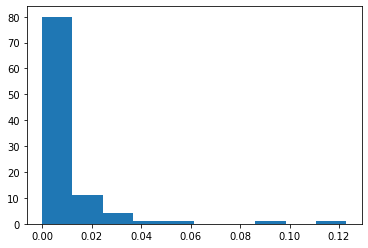

In [77]:
plt.hist(err_train)

In [78]:
from sklearn.metrics import confusion_matrix

# print(confusion_matrix(y_test, y_test_predict))
# к сожалению, матрицу ошибок нельзя посчитать для многомерной классификации:
# --> 255         raise ValueError("%s is not supported" % y_type)
#     256 
#     257     if labels is None:

# ValueError: multilabel-indicator is not supported


Получаем, что в ошибка среднем для каждого класса - 0,93% на обучающей выборке и 0,96% на тестовой. Но нас интересует максимальная ошибка, тогда получаем 12,4% на обучающей выборке и 13,2% на тестовой.
Попробуем уменьшить тестовую ошибку, варьируя параметр `n_neighbours`.

### Подбор параметров

In [79]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [80]:
best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.7967914438502673 1


In [81]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train_best = np.mean(y_train != knn.predict(X_train))
err_test_best  = np.mean(y_test  != knn.predict(X_test))

In [82]:
print(err_train_best, err_test_best)

style_Abbey Single Ale                      0.000000
style_Altbier                               0.000000
style_American Adjunct Lager                0.001188
style_American Amber / Red Ale              0.005942
style_American Amber / Red Lager            0.000594
style_American Barleywine                   0.000000
style_American Black Ale                    0.000594
style_American Blonde Ale                   0.003565
style_American Brown Ale                    0.002377
style_American Dark Wheat Ale               0.000000
style_American Double / Imperial IPA        0.001188
style_American Double / Imperial Pilsner    0.000000
style_American Double / Imperial Stout      0.000000
style_American IPA                          0.005942
style_American India Pale Lager             0.000000
style_American Malt Liquor                  0.000000
style_American Pale Ale (APA)               0.007724
style_American Pale Lager                   0.000594
style_American Pale Wheat Ale               0.

In [83]:
print("Mean error:")
print(np.mean(err_train_best), np.mean(err_test_best))
print("Maximum error:")
print(np.max(err_train_best), np.max(err_test_best))
print("Median:")
print(np.median(err_train_best), np.median(err_test_best))

Mean error:
0.0008402503946175965 0.015445311844203818
Maximum error:
0.007724301841948901 0.16897506925207756
Median:
0.0 0.00554016620498615


(array([74.,  5.,  8.,  5.,  2.,  0.,  2.,  2.,  0.,  1.]),
 array([0.        , 0.00077243, 0.00154486, 0.00231729, 0.00308972,
        0.00386215, 0.00463458, 0.00540701, 0.00617944, 0.00695187,
        0.0077243 ]),
 <a list of 10 Patch objects>)

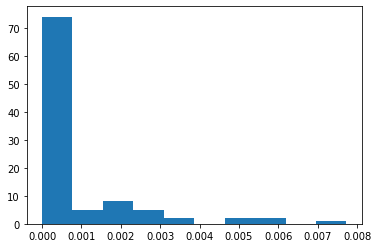

In [84]:
plt.hist(err_train_best)

(array([75., 13.,  3.,  3.,  2.,  0.,  1.,  0.,  1.,  1.]),
 array([0.        , 0.01689751, 0.03379501, 0.05069252, 0.06759003,
        0.08448753, 0.10138504, 0.11828255, 0.13518006, 0.15207756,
        0.16897507]),
 <a list of 10 Patch objects>)

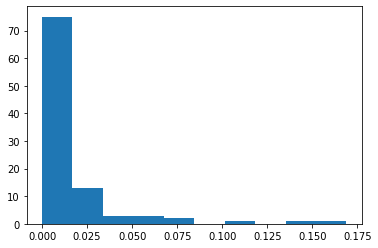

In [85]:
plt.hist(err_test_best)

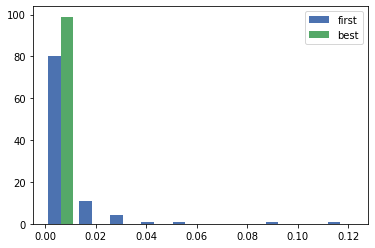

In [86]:
plt.style.use('seaborn-deep')
plt.hist([err_train, err_train_best], label=['first', 'best'])
plt.legend(loc='upper right')

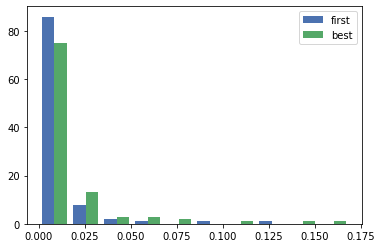

In [87]:
plt.style.use('seaborn-deep')
plt.hist([err_test, err_test_best], label=['first', 'best'])
plt.legend(loc='upper right')

По графикам и данным видно, что на обучающей выборке параметр `n_neighbors=1` улучшил результаты предсказаний до средней ошибки в 0,08% и максимальной ошибки в 0,7%. К сожалению, модель переобучилась, так что на тестовой выборке мы получаем намного более худшие результаты, чем на обучающей выборке - 1,4% средняя ошибка и 15,2% - максимальная.
Для этого метода результат получился лучше при первоначальном количестве ближайших соседей, равном 10.

## Random Forest

In [88]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train_rf = np.mean(y_train != rf.predict(X_train))
err_test_rf  = np.mean(y_test  != rf.predict(X_test))

In [89]:
print(err_train_rf, err_test_rf)

style_Abbey Single Ale                      0.000000
style_Altbier                               0.000000
style_American Adjunct Lager                0.001188
style_American Amber / Red Ale              0.004753
style_American Amber / Red Lager            0.000594
style_American Barleywine                   0.000000
style_American Black Ale                    0.000594
style_American Blonde Ale                   0.001783
style_American Brown Ale                    0.002377
style_American Dark Wheat Ale               0.000000
style_American Double / Imperial IPA        0.001188
style_American Double / Imperial Pilsner    0.000000
style_American Double / Imperial Stout      0.000000
style_American IPA                          0.005942
style_American India Pale Lager             0.000000
style_American Malt Liquor                  0.000000
style_American Pale Ale (APA)               0.007724
style_American Pale Lager                   0.000594
style_American Pale Wheat Ale               0.

In [90]:
print("Mean error:")
print(np.mean(err_train_rf), np.mean(err_test_rf))
print("Maximum error:")
print(np.max(err_train_rf), np.max(err_test_rf))
print("Median:")
print(np.median(err_train_rf), np.median(err_test_rf))

Mean error:
0.0007142128354249565 0.009317552253840334
Maximum error:
0.007724301841948901 0.10803324099722991
Median:
0.0 0.002770083102493075


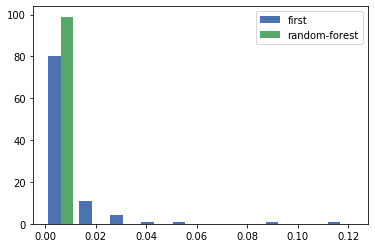

In [91]:
plt.style.use('seaborn-deep')
plt.hist([err_train, err_train_rf], label=['first', 'random-forest'])
plt.legend(loc='upper right')

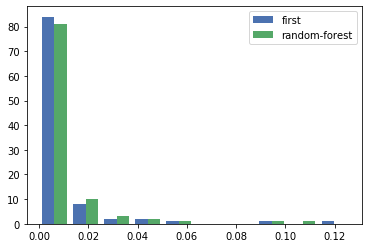

In [92]:
plt.style.use('seaborn-deep')
plt.hist([err_test, err_test_rf], label=['first', 'random-forest'])
plt.legend(loc='upper right')

Итак, на тестовой выборке получаем среднюю ошибку 0,9% и максимальную 10%, что лучше первого запуска метода ближайших соседей, где мы получили 0,96% и 13,2%. Этим запуском мы получили оптимальное решение.

### Значимость признаков

In [93]:
np.sum(rf.feature_importances_)

1.0

In [94]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

N, d = X.shape
print("Feature ranking:")
for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature '  abv' (0.219888)
 2. feature '  ibu' (0.141308)
 3. feature 'ounces' (0.023053)
 4. feature 'state_ CO' (0.005447)
 5. feature 'brewery_name_Oskar Blues Brewery' (0.004276)
 6. feature 'state_ CA' (0.004218)
 7. feature 'state_ TX' (0.003975)
 8. feature 'state_ MI' (0.003677)
 9. feature 'state_ IN' (0.003658)
10. feature 'state_ NY' (0.003543)
11. feature 'state_ OR' (0.003488)
12. feature 'state_ PA' (0.003481)
13. feature 'state_ MA' (0.003469)
14. feature 'state_ IL' (0.003294)
15. feature 'city_Portland' (0.003175)
16. feature 'state_ WI' (0.003016)
17. feature 'brewery_name_Hopworks Urban Brewery' (0.002926)
18. feature 'city_Brooklyn' (0.002888)
19. feature 'state_ WA' (0.002877)
20. feature 'city_Chicago' (0.002767)
21. feature 'brewery_name_Sixpoint Craft Ales' (0.002632)
22. feature 'state_ OH' (0.002584)
23. feature 'state_ MN' (0.002576)
24. feature 'city_Denver' (0.002472)
25. feature 'city_Boulder' (0.002447)
26. feature 'city_Seattle' (0.0

(-1, 20)

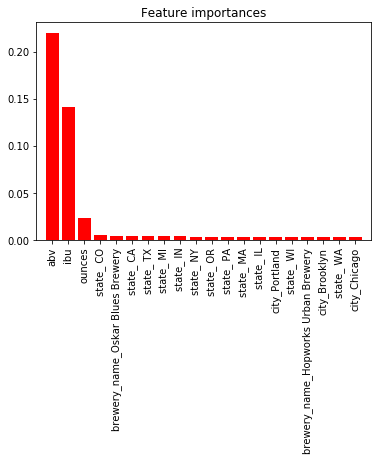

In [95]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

## Вывод

Таким образом, минимальная ошибка алгоритмов на тестовой выборке составила 10%. Оптимальные результаты продемонстрировал алгоритм случайного леса, не сильно опередив метод ближайших соседей с k=10. 